In [1]:
import pyrosetta
import glob
from tqdm import tqdm_notebook as tqdm

In [2]:
pyrosetta.init("-indexed_structure_store:fragment_store /home/bcov/sc/scaffold_comparison/data/ss_grouped_vall_all.h5")

PyRosetta-4 2020 [Rosetta PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python37.Release 2020.23+release.0d6f90a8cb9fa0567ca76bb71ee93bfe73340c70 2020-06-04T19:12:24] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: {0} Checking for fconfig files in pwd and ./rosetta/flags
core.init: {0} Rosetta version: PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python37.Release r257 2020.23+release.0d6f90a 0d6f90a8cb9fa0567ca76bb71ee93bfe73340c70 http://www.pyrosetta.org 2020-06-04T19:12:24
core.init: {0} command: PyRosetta -indexed_structure_store:fragment_store /home/bcov/sc/scaffold_comparison/data/ss_grouped_vall_all.h5 -database /home/rdkibler/.conda/envs/pyro/lib/python3.7/site-packages/pyrosetta/database
basic.random.init_random_generator: {0} 'RNG device' seed mode, using '/dev/urandom', seed=-564727933 seed_offset=0 real_seed=-564727933 thread_index=0
basic.random.

In [3]:
pose = pyrosetta.pose_from_file("/net/scratch/rdkibler/210129_assemble_nmp_designs/0/RC4_20_mini_nm_00000_1.6_31_0001_0005_hb_designed_cstmin_asu.pdb.gz")

core.chemical.GlobalResidueTypeSet: {0} Finished initializing fa_standard residue type set.  Created 980 residue types
core.chemical.GlobalResidueTypeSet: {0} Total time to initialize 1.12315 seconds.
core.import_pose.import_pose: {0} File '/net/scratch/rdkibler/210129_assemble_nmp_designs/0/RC4_20_mini_nm_00000_1.6_31_0001_0005_hb_designed_cstmin_asu.pdb.gz' automatically determined to be of type PDB


In [4]:
xml_obj = pyrosetta.rosetta.protocols.rosetta_scripts.XmlObjects.create_from_string(f"""
<FILTERS>
    <worst9mer name="worst9mer" rmsd_lookup_threshold="0.4" confidence="0" />
</FILTERS>
""")
worst9mer = xml_obj.get_filter("worst9mer")

protocols.rosetta_scripts.RosettaScriptsParser: {0} Generating XML Schema for rosetta_scripts...
protocols.rosetta_scripts.RosettaScriptsParser: {0} ...done
protocols.rosetta_scripts.RosettaScriptsParser: {0} Initializing schema validator...
protocols.rosetta_scripts.RosettaScriptsParser: {0} ...done
protocols.rosetta_scripts.RosettaScriptsParser: {0} Validating input script...
protocols.rosetta_scripts.RosettaScriptsParser: {0} ...done
protocols.rosetta_scripts.RosettaScriptsParser: {0} Parsed script:
<ROSETTASCRIPTS>
	<FILTERS>
		<worst9mer confidence="0" name="worst9mer" rmsd_lookup_threshold="0.4"/>
	</FILTERS>
	<PROTOCOLS/>
</ROSETTASCRIPTS>
core.scoring.ScoreFunctionFactory: {0} SCOREFUNCTION: ref2015
core.scoring.etable: {0} Starting energy table calculation
core.scoring.etable: {0} smooth_etable: changing atr/rep split to bottom of energy well
core.scoring.etable: {0} smooth_etable: spline smoothing lj etables (maxdis = 6)
core.scoring.etable: {0} smooth_etable: spline smoothin

In [5]:
val = worst9mer.score(pose)

protocols.filters.LeastNativeLike9merFilter: {0} position:216 rmsd:0.417101
protocols.filters.LeastNativeLike9merFilter: {0} position:217 rmsd:0.433861


In [8]:
scom = pyrosetta.rosetta.protocols.simple_moves.SwitchChainOrderMover()
scom.chain_order("A")

core.scoring.ScoreFunctionFactory: {0} SCOREFUNCTION: ref2015


In [11]:
pdbs = glob.glob("/net/scratch/rdkibler/210129_assemble_nmp_designs/0/*.pdb") #grab the relaxed stuff
worst9mer_data = []
for pdb in tqdm(pdbs):
    name = pdb.split("/")[-1].split(".pdb")[0]
    pose = pyrosetta.pose_from_file(pdb)
    scom.apply(pose) #isolate chain A
    val = worst9mer.score(pose)
    worst9mer_data.append([name,val])

/home/rdkibler/.conda/envs/pyro/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


core.import_pose.import_pose: {0} File '/net/scratch/rdkibler/210129_assemble_nmp_designs/0/RC4_20_mini_nm_00050_1.6_31_0001_0054_hb_designed_relax_sym.pdb' automatically determined to be of type PDB
protocols.simple_moves.SwitchChainOrderMover: {0} Number of chains in pose: 4
protocols.simple_moves.SwitchChainOrderMover: {0} Now at chain: 1
protocols.simple_moves.SwitchChainOrderMover: {0} New pose's foldtree FOLD_TREE  EDGE 1 276 -1
core.import_pose.import_pose: {0} File '/net/scratch/rdkibler/210129_assemble_nmp_designs/0/RC4_20_mini_nm_00121_1.6_31_0001_0040_hb_0005_designed_relax_sym.pdb' automatically determined to be of type PDB
protocols.simple_moves.SwitchChainOrderMover: {0} Number of chains in pose: 4
protocols.simple_moves.SwitchChainOrderMover: {0} Now at chain: 1
protocols.simple_moves.SwitchChainOrderMover: {0} New pose's foldtree FOLD_TREE  EDGE 1 276 -1
protocols.filters.LeastNativeLike9merFilter: {0} position:161 rmsd:0.418672
core.import_pose.import_pose: {0} File '/

[['RC4_20_mini_nm_00216_1.6_31_0001_0030_hb_designed_cstmin_asu',
  0.3799080746630236],
 ['RC4_20_mini_nm_00048_1.6_31_0001_0010_hb_0001_designed_cstmin_asu',
  0.3944574839099703],
 ['RC4_20_mini_nm_00117_1.6_31_0001_0010_hb_0002_designed_cstmin_asu',
  0.40322552320750527]]

[['RC4_20_mini_nm_00050_1.6_31_0001_0054_hb_designed_relax_sym',
  0.37828116282446655],
 ['RC4_20_mini_nm_00121_1.6_31_0001_0040_hb_0005_designed_relax_sym',
  0.41867193777437484],
 ['RC4_20_mini_nm_00024_1.6_31_0001_0054_hb_0001_designed_relax_sym',
  0.3809265147542303]]

In [12]:
len(worst9mer_data)

880

In [15]:
import pandas as pd
df = pd.DataFrame(worst9mer_data,columns=['decoy','worst9mer'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffa5860f28>]],
      dtype=object)

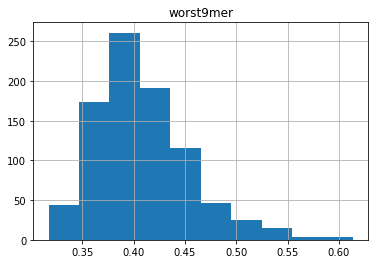

In [16]:
df.hist('worst9mer')

In [26]:
with open("../worst9mer.csv",'w') as f:
    f.write(df.to_csv())

In [29]:
print(df.to_csv(index=False))

decoy,worst9mer
RC4_20_mini_nm_00050_1.6_31_0001_0054_hb_designed_relax_sym,0.37828116282446655
RC4_20_mini_nm_00121_1.6_31_0001_0040_hb_0005_designed_relax_sym,0.41867193777437484
RC4_20_mini_nm_00024_1.6_31_0001_0054_hb_0001_designed_relax_sym,0.3809265147542303
RC4_20_mini_nm_00249_1.6_31_0001_0010_hb_0010_designed_relax_sym,0.4570531920000171
RC4_20_mini_nm_00149_1.6_31_0001_0043_hb_0003_designed_relax_sym,0.4715139787944739
RC4_20_mini_nm_00211_1.6_31_0001_0058_hb_designed_relax_sym,0.4952904598300949
RC4_20_mini_nm_00063_1.6_31_0001_0001_hb_0003_designed_relax_sym,0.43287870370561654
RC4_20_mini_nm_00227_1.6_31_0001_0011_hb_designed_relax_sym,0.40924343995482754
RC4_20_mini_nm_00091_1.6_31_0001_0054_hb_designed_relax_sym,0.3781728109565194
RC4_20_mini_nm_00225_1.6_31_0001_0051_hb_0001_designed_relax_sym,0.45812689722101146
RC4_20_mini_nm_00021_1.6_31_0001_0027_hb_0001_designed_relax_sym,0.3690524017649465
RC4_20_mini_nm_00098_1.6_31_0001_0051_hb_0002_designed_relax_sym,0.36213004